In [5]:
import pandas as pd

df = pd.read_csv('~/Downloads/BigML_Dataset_5f50a62795a9306aa200003e.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

In [6]:
df.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


In [7]:
df.describe()

,Age,How many books did you read during last 12months?
count,2832.000000,2832.000000
mean,47.276483,16.676201
std,18.565516,23.632071
min,16.000000,0.000000
25%,32.000000,2.750000
50%,48.000000,6.000000
75%,62.000000,20.000000
max,93.000000,97.000000


In [44]:
df01 = df[['Age','How many books did you read during last 12months?']].copy()

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs    = pd.DataFrame(scaler.fit_transform(df01),
                      columns=df01.columns,
                      index=df01.index)

dfs

,Age,How many books did you read during last 12months?
0,1.008689,3.399532
1,-0.068768,3.399532
2,-0.822987,3.399532
3,-1.092351,3.399532
4,-1.684952,3.399532
...,...,...
2827,-1.577207,-0.705784
2828,-1.631079,-0.705784
2829,-1.631079,-0.705784
2830,-1.684952,-0.705784


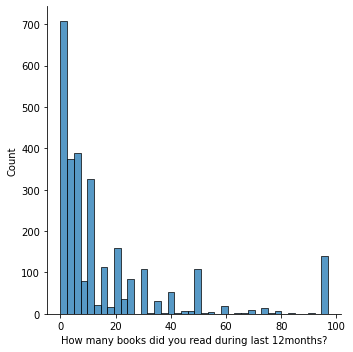

In [11]:
import seaborn as sns

sns.displot(df['How many books did you read during last 12months?'])

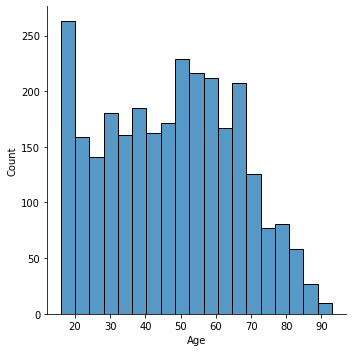

In [13]:
sns.displot(df['Age'])

<AxesSubplot:>

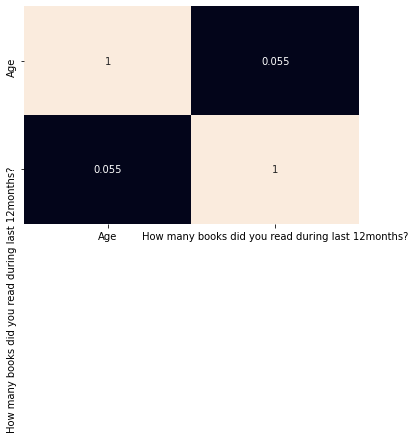

In [14]:
sns.heatmap(df.corr(), 
            cbar=False, 
            annot=True)

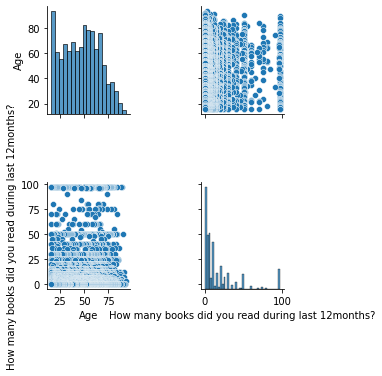

In [15]:
sns.pairplot(df)

In [30]:
df_new = df[['Age','How many books did you read during last 12months?']].copy()

In [31]:
df_new.head()

,Age,How many books did you read during last 12months?
0,66,97
1,46,97
2,32,97
3,27,97
4,16,97


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs    = pd.DataFrame(scaler.fit_transform(df_new),
                      columns=df_new.columns,
                      index=df_new.index)

dfs

,Age,How many books did you read during last 12months?
0,1.008689,3.399532
1,-0.068768,3.399532
2,-0.822987,3.399532
3,-1.092351,3.399532
4,-1.684952,3.399532
...,...,...
2827,-1.577207,-0.705784
2828,-1.631079,-0.705784
2829,-1.631079,-0.705784
2830,-1.684952,-0.705784


In [33]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, random_state=42)

km = model.fit(df_new)

In [35]:
km.cluster_centers_

array([[73.12149533,  5.25      ],
       [28.37      , 24.18      ],
       [63.58490566, 93.40566038],
       [37.26223092,  5.05479452],
       [54.02572347,  4.59485531],
       [63.09929078, 48.25531915],
       [29.57894737, 95.38596491],
       [21.63397129,  5.18660287],
       [58.54230769, 23.19230769],
       [30.16853933, 49.02247191]])

In [36]:
km.labels_

array([2, 6, 6, ..., 7, 7, 7], dtype=int32)

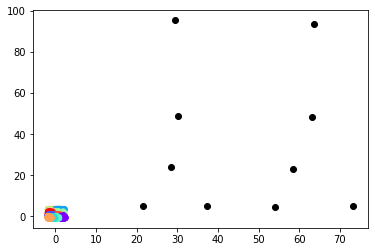

In [38]:
from matplotlib import pyplot as plt

plt.scatter(dfs['Age'].values,
            dfs['How many books did you read during last 12months?'].values,
            c=km.labels_, 
            cmap='rainbow')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            color='black') 

plt.show()

In [39]:
import json

def get_inertia_by_k(max_k=10):
    results = {}
    for k in range(1,max_k):
        model = KMeans(n_clusters=k)
        model.fit(dfs) 
        results[k] = model.inertia_ 
    return results


results = get_inertia_by_k()
print(json.dumps(results, indent=2))

{
  "1": 5663.999999999966,
  "2": 3531.822263990598,
  "3": 1738.8330312387702,
  "4": 1358.450278213708,
  "5": 1045.0159932482447,
  "6": 854.2244365452433,
  "7": 725.8493555043414,
  "8": 601.9036656321719,
  "9": 529.8204888258912
}


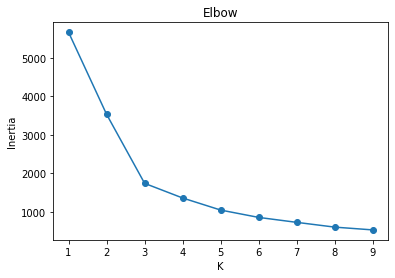

In [41]:
k        = list(results.keys())
inertias = list(results.values())

# 'o' for dots and '-' for lines
plt.plot(k, inertias, 'o-') 
plt.xlabel('K') 
plt.ylabel('Inertia') 
plt.title('Elbow') 
plt.show()

In [42]:
from sklearn.cluster import KMeans

# create k-mean object
model = KMeans(n_clusters=3, random_state=42)

# train model
best_km = model.fit(dfs)

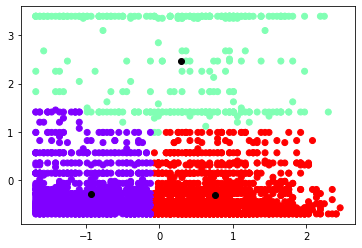

In [43]:
plt.scatter(dfs['Age'].values,
            dfs['How many books did you read during last 12months?'].values,
            c=best_km.labels_, 
            cmap='rainbow')

# plot centroids
plt.scatter(best_km.cluster_centers_[:, 0],
            best_km.cluster_centers_[:, 1],
            color='black') 

plt.show()